
# **DEI Survey Results and Analysis**



## Committee questions to further analyze

### 1) How does the distribution of demographics (race, age, sexual orientation, tenure and status) compare to the gallup responses:

- At work I am treated with respect. 
- At work, I feel comfortable being myself.
- Diversity and Inclusiveness issues are openly discussed.
- Employees in my organization are treated with respect and dignity.
- Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.
- I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.
- If I raised a concern about ethics and integrity, I am confident my employer would do what is right.
- My organization treasures diverse opinions and ideas. 
- My team members appreciate my contributions.
- My supervisor tries to understand my point of view. 
- My workplace is committed to building the strengths of each employee.

### 2) Are there any correlations between gallup responses and demographics?

## Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install squarify
#plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import pygsheets
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

## Import data


In [ ]:
dei = pd.read_csv("DEISurveyFinal.csv")
dei

## Value counts for demographics 

### Age

In [10]:
dei["What is your age?"].value_counts()

25-34    86
35-44    47
45-54    28
55-64    25
18-24    12
65-74     6
Name: What is your age?, dtype: int64

### Race

In [11]:
dei["What is your race? "].value_counts()

White                         86
Latino/Hispanic               68
Black/ African American       24
Two or more Races             15
Asian                          3
Indian/ Native American        2
Puerto Rican                   1
White Latino-Immigrant         1
White/Multi-racial Latino      1
not sure                       1
Hispanic/white                 1
Afro Latinx                    1
Name: What is your race? , dtype: int64

#### comment: consider cleeaning (i.e., Hispanice/white to Latino/Hispanic or Twor or more Races)

### Sexual orientation

In [12]:
dei["What is your sexual orientation?"].value_counts()

Straight    161
LGBTQ+       35
Name: What is your sexual orientation?, dtype: int64

### Tenure

In [13]:
dei["How long have you worked for FC?"].value_counts()

1-3 years           70
3-5 years           40
Less than a year    32
5-10 years          28
10+ years           23
1 year              11
Name: How long have you worked for FC?, dtype: int64

### Status

In [14]:
dei['What is your employment status?'].value_counts()

Full-time              180
Part-time               19
Seasonal                 3
Part-time, Seasonal      2
Name: What is your employment status?, dtype: int64

## Compare demographics to gallup responses

### At work I am treated with respect.

In [20]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'At work, I am treated with respect.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'At work, I am treated with respect.'}]}
                   ]
#defining graph objects
x_total = dei['At work, I am treated with respect.  ']
x_white = dei[dei['What is your race? ']=="White"]["At work, I am treated with respect.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["At work, I am treated with respect.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["At work, I am treated with respect.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["At work, I am treated with respect.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["At work, I am treated with respect.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["At work, I am treated with respect.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["At work, I am treated with respect.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["At work, I am treated with respect.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["At work, I am treated with respect.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["At work, I am treated with respect.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["At work, I am treated with respect.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["At work, I am treated with respect.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["At work, I am treated with respect.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["At work, I am treated with respect.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["At work, I am treated with respect.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["At work, I am treated with respect.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["At work, I am treated with respect.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["At work, I am treated with respect.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["At work, I am treated with respect.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["At work, I am treated with respect.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["At work, I am treated with respect.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["At work, I am treated with respect.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["At work, I am treated with respect.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["At work, I am treated with respect.  "]
#defining data
data=[go.Histogram(x=x_total,name='  ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='At work, I am treated with respect.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()


### At work, I feel comfortable being myself.

In [21]:
#At work, I feel comfortable being myself.  
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'At work, I feel comfortable being myself.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'At work, I feel comfortable being myself.'}]}
                   ]
#defining graph objects
x_total = dei['At work, I feel comfortable being myself.  ']
x_white = dei[dei['What is your race? ']=="White"]["At work, I feel comfortable being myself.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["At work, I feel comfortable being myself.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["At work, I feel comfortable being myself.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["At work, I feel comfortable being myself.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["At work, I feel comfortable being myself.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["At work, I feel comfortable being myself.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["At work, I feel comfortable being myself.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["At work, I feel comfortable being myself.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["At work, I feel comfortable being myself.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["At work, I feel comfortable being myself.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["At work, I feel comfortable being myself.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["At work, I feel comfortable being myself.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["At work, I feel comfortable being myself.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["At work, I feel comfortable being myself.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["At work, I feel comfortable being myself.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["At work, I feel comfortable being myself.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["At work, I feel comfortable being myself.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["At work, I feel comfortable being myself.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["At work, I feel comfortable being myself.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["At work, I feel comfortable being myself.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["At work, I feel comfortable being myself.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["At work, I feel comfortable being myself.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["At work, I feel comfortable being myself.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["At work, I feel comfortable being myself.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='At work, I feel comfortable being myself.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### Employees in my organization are treated with respect and dignity.  

In [22]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]}
                   ]
#defining graph objects
x_total = dei["Employees in my organization are treated with respect and dignity.  "]
x_white = dei[dei['What is your race? ']=="White"]["Employees in my organization are treated with respect and dignity.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["Employees in my organization are treated with respect and dignity.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["Employees in my organization are treated with respect and dignity.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["Employees in my organization are treated with respect and dignity.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["Employees in my organization are treated with respect and dignity.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["Employees in my organization are treated with respect and dignity.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["Employees in my organization are treated with respect and dignity.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["Employees in my organization are treated with respect and dignity.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["Employees in my organization are treated with respect and dignity.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["Employees in my organization are treated with respect and dignity.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["Employees in my organization are treated with respect and dignity.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["Employees in my organization are treated with respect and dignity.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["Employees in my organization are treated with respect and dignity.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["Employees in my organization are treated with respect and dignity.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["Employees in my organization are treated with respect and dignity.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["Employees in my organization are treated with respect and dignity.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["Employees in my organization are treated with respect and dignity.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["Employees in my organization are treated with respect and dignity.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["Employees in my organization are treated with respect and dignity.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='Employees in my organization are treated with respect and dignity.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### Diversity and Inclusiveness issues are openly discussed.    

In [23]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Employees in my organization are treated with respect and dignity.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.  '}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'Diversity and Inclusiveness issues are openly discussed.  '}]}
                   ]
#defining graph objects
x_total = dei["Diversity and Inclusiveness issues are openly discussed.  "]
x_white = dei[dei['What is your race? ']=="White"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["Diversity and Inclusiveness issues are openly discussed.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["Diversity and Inclusiveness issues are openly discussed.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='Diversity and Inclusiveness issues are openly discussed.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance. 

In [26]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  '}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  '}]}
                   ]
#defining graph objects
x_total = dei["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_white = dei[dei['What is your race? ']=="White"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.  "]
#defining data
data=[go.Histogram(x=x_total,name='  ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.

In [25]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.'}]}
                   ]
#defining graph objects
x_total = dei["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_white = dei[dei['What is your race? ']=="White"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### If I raised a concern about ethics and integrity, I am confident my employer would do what is right. 

In [28]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'If I raised a concern about ethics and integrity, I am confident my employer would do what is right.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'If I raised a concern about ethics and integrity, I am confident my employer would do what is right.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'If I raised a concern about ethics and integrity, I am confident my employer would do what is right.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'If I raised a concern about ethics and integrity, I am confident my employer would do what is right.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'If I raised a concern about ethics and integrity, I am confident my employer would do what is right. '}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'If I raised a concern about ethics and integrity, I am confident my employer would do what is right.'}]}
                   ]
#defining graph objects
x_total = dei["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_white = dei[dei['What is your race? ']=="White"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_asian = dei[dei['What is your race? ']=="Asian"]["I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["If I raised a concern about ethics and integrity, I am confident my employer would do what is right. "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='If I raised a concern about ethics and integrity, I am confident my employer would do what is right.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### My organization treasures diverse opinions and ideas.

In [29]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My organization treasures diverse opinions and ideas.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My organization treasures diverse opinions and ideas.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My organization treasures diverse opinions and ideas.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My organization treasures diverse opinions and ideas.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'My organization treasures diverse opinions and ideas.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'My organization treasures diverse opinions and ideas.'}]}
                   ]
#defining graph objects
x_total = dei["My organization treasures diverse opinions and ideas."]
x_white = dei[dei['What is your race? ']=="White"]["My organization treasures diverse opinions and ideas."]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["My organization treasures diverse opinions and ideas."]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["My organization treasures diverse opinions and ideas."]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["My organization treasures diverse opinions and ideas."]
x_asian = dei[dei['What is your race? ']=="Asian"]["My organization treasures diverse opinions and ideas."]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["My organization treasures diverse opinions and ideas."]
x_age1 = dei[dei["What is your age?"]=="25-34"]["My organization treasures diverse opinions and ideas."]
x_age2 = dei[dei["What is your age?"]=="35-44"]["My organization treasures diverse opinions and ideas."]
x_age3 = dei[dei["What is your age?"]=="45-54"]["My organization treasures diverse opinions and ideas."]
x_age4 = dei[dei["What is your age?"]=="55-64"]["My organization treasures diverse opinions and ideas."]
x_age5 = dei[dei["What is your age?"]=="18-24"]["My organization treasures diverse opinions and ideas."]
x_age6 = dei[dei["What is your age?"]=="65-74"]["My organization treasures diverse opinions and ideas."]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["My organization treasures diverse opinions and ideas."]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["My organization treasures diverse opinions and ideas."]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["My organization treasures diverse opinions and ideas."]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["My organization treasures diverse opinions and ideas."]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["My organization treasures diverse opinions and ideas."]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["My organization treasures diverse opinions and ideas."]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["My organization treasures diverse opinions and ideas."]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["My organization treasures diverse opinions and ideas."]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["My organization treasures diverse opinions and ideas."]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["My organization treasures diverse opinions and ideas."]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["My organization treasures diverse opinions and ideas."]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["My organization treasures diverse opinions and ideas."]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='My organization treasures diverse opinions and ideas.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### My team members appreciate my contributions. 

In [30]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My team members appreciate my contributions.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My team members appreciate my contributions.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My team members appreciate my contributions.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My team members appreciate my contributions.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'My team members appreciate my contributions.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'My team members appreciate my contributions.'}]}
                   ]
#defining graph objects
x_total = dei["My team members appreciate my contributions. "]
x_white = dei[dei['What is your race? ']=="White"]["My team members appreciate my contributions. "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["My team members appreciate my contributions. "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["My team members appreciate my contributions. "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["My team members appreciate my contributions. "]
x_asian = dei[dei['What is your race? ']=="Asian"]["My team members appreciate my contributions. "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["My team members appreciate my contributions. "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["My team members appreciate my contributions. "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["My team members appreciate my contributions. "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["My team members appreciate my contributions. "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["My team members appreciate my contributions. "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["My team members appreciate my contributions. "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["My team members appreciate my contributions. "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["My team members appreciate my contributions. "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["My team members appreciate my contributions. "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["My team members appreciate my contributions. "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["My team members appreciate my contributions. "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["My team members appreciate my contributions. "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["My team members appreciate my contributions. "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["My team members appreciate my contributions. "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["My team members appreciate my contributions. "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["My team members appreciate my contributions. "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["My team members appreciate my contributions. "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["My team members appreciate my contributions. "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["My team members appreciate my contributions. "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='My team members appreciate my contributions.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### My supervisor tries to understand my point of view.  

In [31]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My supervisor tries to understand my point of view.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My supervisor tries to understand my point of view.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My supervisor tries to understand my point of view.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My supervisor tries to understand my point of view.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'My supervisor tries to understand my point of view.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'My supervisor tries to understand my point of view.'}]}
                   ]
#defining graph objects
x_total = dei["My supervisor tries to understand my point of view.  "]
x_white = dei[dei['What is your race? ']=="White"]["My supervisor tries to understand my point of view.  "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["My supervisor tries to understand my point of view.  "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["My supervisor tries to understand my point of view.  "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["My supervisor tries to understand my point of view.  "]
x_asian = dei[dei['What is your race? ']=="Asian"]["My supervisor tries to understand my point of view.  "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["My supervisor tries to understand my point of view.  "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["My supervisor tries to understand my point of view.  "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["My supervisor tries to understand my point of view.  "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["My supervisor tries to understand my point of view.  "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["My supervisor tries to understand my point of view.  "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["My supervisor tries to understand my point of view.  "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["My supervisor tries to understand my point of view.  "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["My supervisor tries to understand my point of view.  "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["My supervisor tries to understand my point of view.  "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["My supervisor tries to understand my point of view.  "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["My supervisor tries to understand my point of view.  "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["My supervisor tries to understand my point of view.  "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["My supervisor tries to understand my point of view.  "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["My supervisor tries to understand my point of view.  "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["My supervisor tries to understand my point of view.  "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["My supervisor tries to understand my point of view.  "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["My supervisor tries to understand my point of view.  "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["My supervisor tries to understand my point of view.  "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["My supervisor tries to understand my point of view.  "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='My supervisor tries to understand my point of view.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

### My workplace is committed to building the strengths of each employee.   

In [32]:
#defining list_updatemenus
list_updatemenus = [{'label': 'Total',
                     'method': 'update',
                     'args': [{'visible': [True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My workplace is committed to building the strengths of each employee.'}]},
                    {'label': 'Race',
                     'method': 'update',
                     'args': [{'visible': [False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My workplace is committed to building the strengths of each employee.'}]},
                    {'label': 'Age',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My workplace is committed to building the strengths of each employee.'}]},
                    {'label': 'Sexual Orientation',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False]}, {'title': 'My workplace is committed to building the strengths of each employee.'}]},
                   {'label': 'Tenure',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, False, False, False]}, {'title': 'My workplace is committed to building the strengths of each employee.'}]},
                   {'label': 'Status',
                     'method': 'update',
                     'args': [{'visible': [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True]}, {'title': 'My workplace is committed to building the strengths of each employee.'}]}
                   ]
#defining graph objects
x_total = dei["My workplace is committed to building the strengths of each employee.   "]
x_white = dei[dei['What is your race? ']=="White"]["My workplace is committed to building the strengths of each employee.   "]
x_latinx = dei[dei['What is your race? ']=="Latino/Hispanic"]["My workplace is committed to building the strengths of each employee.   "]
x_black = dei[dei['What is your race? ']=="Black/ African American"]["My workplace is committed to building the strengths of each employee.   "]
x_two_plus = dei[dei['What is your race? ']=="Two or more Races"]["My workplace is committed to building the strengths of each employee.   "]
x_asian = dei[dei['What is your race? ']=="Asian"]["My workplace is committed to building the strengths of each employee.   "]
x_first_peoples = dei[dei['What is your race? ']=="Indian/ Native American"]["My workplace is committed to building the strengths of each employee.   "]
x_age1 = dei[dei["What is your age?"]=="25-34"]["My workplace is committed to building the strengths of each employee.   "]
x_age2 = dei[dei["What is your age?"]=="35-44"]["My workplace is committed to building the strengths of each employee.   "]
x_age3 = dei[dei["What is your age?"]=="45-54"]["My workplace is committed to building the strengths of each employee.   "]
x_age4 = dei[dei["What is your age?"]=="55-64"]["My workplace is committed to building the strengths of each employee.   "]
x_age5 = dei[dei["What is your age?"]=="18-24"]["My workplace is committed to building the strengths of each employee.   "]
x_age6 = dei[dei["What is your age?"]=="65-74"]["My workplace is committed to building the strengths of each employee.   "]
x_straight = dei[dei["What is your sexual orientation?"]=="Straight"]["My workplace is committed to building the strengths of each employee.   "]
x_lgbtq = dei[dei["What is your sexual orientation?"]=="LGBTQ+"]["My workplace is committed to building the strengths of each employee.   "]
x_tenure1 = dei[dei["How long have you worked for FC?"]=="1-3 years"]["My workplace is committed to building the strengths of each employee.   "]
x_tenure2 = dei[dei["How long have you worked for FC?"]=="3-5 years"]["My workplace is committed to building the strengths of each employee.   "]
x_tenure3 = dei[dei["How long have you worked for FC?"]=="Less than a year"]["My workplace is committed to building the strengths of each employee.   "]
x_tenure4 = dei[dei["How long have you worked for FC?"]=="5-10 years"]["My workplace is committed to building the strengths of each employee.   "]
x_tenure5 = dei[dei["How long have you worked for FC?"]=="10+ years"]["My workplace is committed to building the strengths of each employee.   "]
x_tenure6 = dei[dei["How long have you worked for FC?"]=="1 year"]["My workplace is committed to building the strengths of each employee.   "]
x_status1 = dei[dei["What is your employment status?"]=="Full-time"]["My workplace is committed to building the strengths of each employee.   "]
x_status2 = dei[dei["What is your employment status?"]=="Part-time"]["My workplace is committed to building the strengths of each employee.   "]
x_status3 = dei[dei["What is your employment status?"]=="Seasonal"]["My workplace is committed to building the strengths of each employee.   "]
x_status4 = dei[dei["What is your employment status?"]=="Part-time, Seasonal"]["My workplace is committed to building the strengths of each employee.   "]
#defining data
data=[go.Histogram(x=x_total,name='   ',opacity = .5),
      go.Histogram(x=x_white,name='White',opacity = .5),
      go.Histogram(x=x_latinx,name='Latino/Hispanic',opacity = .5),
      go.Histogram(x=x_black,name='Black/African American',opacity = .5),
      go.Histogram(x=x_two_plus,name='Two or more Races',opacity = .5),
      go.Histogram(x=x_asian,name='Asian',opacity = .5),
      go.Histogram(x=x_first_peoples,name='Indian/Native American',opacity = .5),
      go.Histogram(x=x_age1,name='25-34', opacity = .5),
      go.Histogram(x=x_age2,name='35-44',opacity = .5),
      go.Histogram(x=x_age3,name='45-54',opacity = .5),
      go.Histogram(x=x_age4,name='55-64',opacity = .5),
      go.Histogram(x=x_age5,name='18-24',opacity = .5),
      go.Histogram(x=x_age6,name='65-74',opacity = .5),
      go.Histogram(x=x_straight,name='Straight',opacity = .5),
      go.Histogram(x=x_lgbtq,name='LGBTQ+',opacity = .5),
      go.Histogram(x=x_tenure1,name='1-3 years',opacity = .5),
      go.Histogram(x=x_tenure2,name='3-5 years',opacity = .5),
      go.Histogram(x=x_tenure3,name='< than a year',opacity = .5),
      go.Histogram(x=x_tenure4,name='5-10 years',opacity = .5),
      go.Histogram(x=x_tenure5,name='10+ years',opacity = .5),
      go.Histogram(x=x_tenure6,name='1 year',opacity = .5),
      go.Histogram(x=x_status1,name='Full-time',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time',opacity = .5),
      go.Histogram(x=x_status2,name='Seasonal',opacity = .5),
      go.Histogram(x=x_status2,name='Part-time, Seasonal',opacity = .5)
     
     ]


#defining layout
layout=go.Layout(title='My workplace is committed to building the strengths of each employee.',updatemenus=list([dict(buttons= list_updatemenus,type = 'buttons')]),barmode='stack')

#defining layout and plotting
fig = go.Figure(data,layout)
fig.show()

## Are there any correlations between gallup responses and demographics?

In [33]:
import pingouin as pg

In [47]:
# Calculate the pairwise Spearman correlation
corr = pg.pairwise_corr(dei, columns=['At work, I am treated with respect.  '], method='spearman')
# Sort the correlation by p-values and display the first rows
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
2,"At work, I am treated with respect.",Employees in my organization are treated with ...,205,0.645767,1.409033e-25
0,"At work, I am treated with respect.","At work, I feel comfortable being myself.",205,0.643253,2.482383e-25
9,"At work, I am treated with respect.",My workplace is committed to building the stre...,203,0.602104,2.063909e-21
3,"At work, I am treated with respect.",Everyone at this organization is treated fairl...,202,0.573724,4.464958e-19
8,"At work, I am treated with respect.",My supervisor tries to understand my point of ...,202,0.566666,1.489595e-18


Text(0.5, 1, 'Correlation matrix')

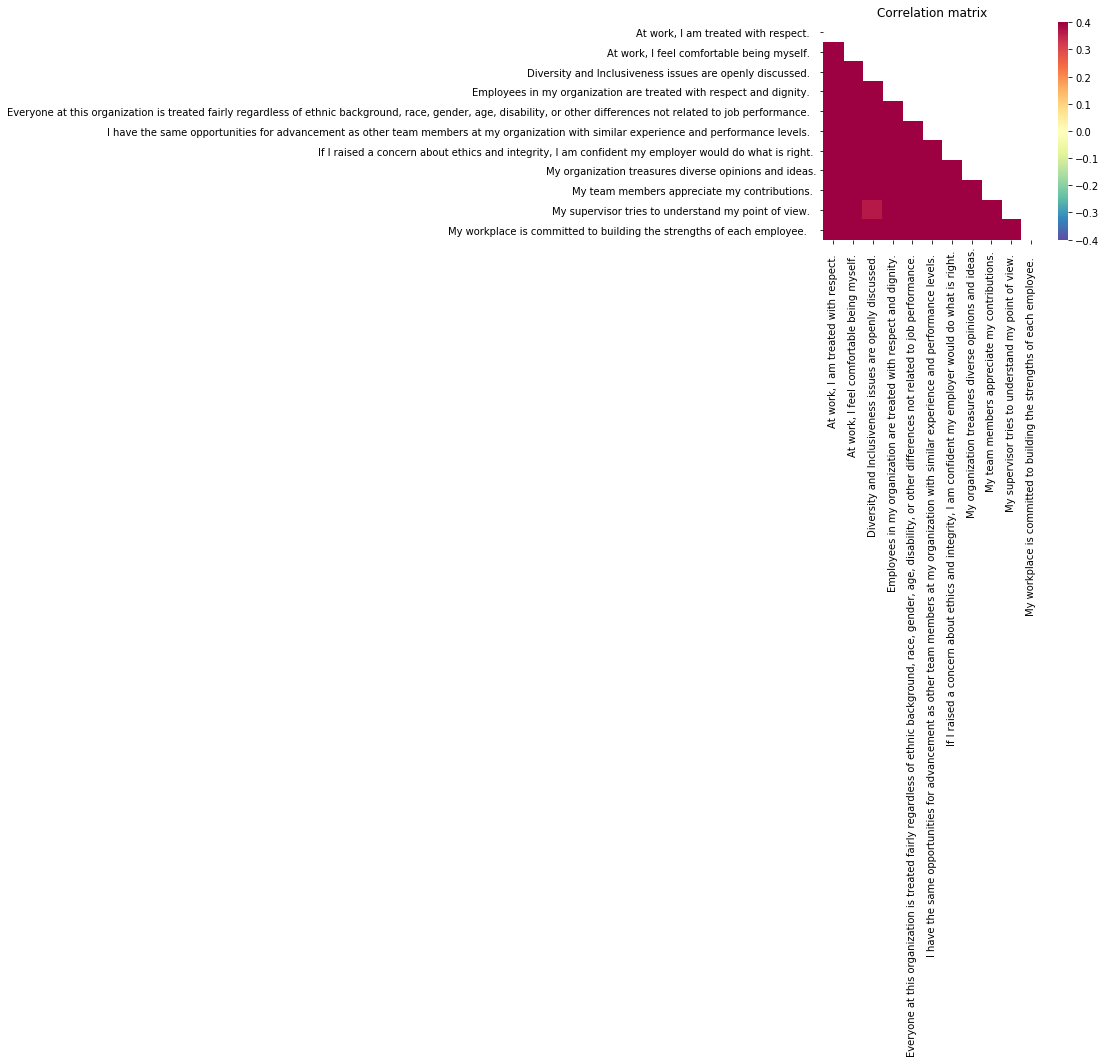

In [42]:
corrs = dei.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [43]:
dei.rcorr(stars=False)

,"At work, I am treated with respect.","At work, I feel comfortable being myself.",Diversity and Inclusiveness issues are openly discussed.,Employees in my organization are treated with respect and dignity.,"Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.",I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.,"If I raised a concern about ethics and integrity, I am confident my employer would do what is right.",My organization treasures diverse opinions and ideas.,My team members appreciate my contributions.,My supervisor tries to understand my point of view.,My workplace is committed to building the strengths of each employee.
"At work, I am treated with respect.",-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"At work, I feel comfortable being myself.",0.706,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Diversity and Inclusiveness issues are openly discussed.,0.461,0.465,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Employees in my organization are treated with respect and dignity.,0.654,0.549,0.583,-,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"Everyone at this organization is treated fairly regardless of ethnic background, race, gender, age, disability, or other differences not related to job performance.",0.568,0.558,0.662,0.775,-,0.000,0.000,0.000,0.000,0.000,0.000
I have the same opportunities for advancement as other team members at my organization with similar experience and performance levels.,0.553,0.488,0.535,0.613,0.692,-,0.000,0.000,0.000,0.000,0.000
"If I raised a concern about ethics and integrity, I am confident my employer would do what is right.",0.548,0.515,0.651,0.71,0.75,0.621,-,0.000,0.000,0.000,0.000
My organization treasures diverse opinions and ideas.,0.516,0.532,0.678,0.671,0.738,0.6,0.795,-,0.000,0.000,0.000
My team members appreciate my contributions.,0.6,0.548,0.44,0.527,0.464,0.421,0.435,0.478,-,0.000,0.000
My supervisor tries to understand my point of view.,0.611,0.52,0.366,0.503,0.43,0.45,0.465,0.446,0.679,-,0.000
